In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import sklearn as skl
import random
import sklearn.linear_model

from matplotlib import pyplot as plt

random.seed(42)
np.random.seed(42)

### R vs (p)ppGpp Function

In [8]:
ppGpp_RNA_Prot_data_wu = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Wu_and_Balakrishnan_ppGpp_R.csv",)

In [9]:
R_max = 0.793

def hill_fn_n1(g, k, R_0, n=1, R_max=R_max):
    return ((k/((g**n)+k))*(R_max-R_0)) + R_0

def inverse_fn(g, a):
    return a/g

## fitting k to the restricted model
initial_guess = [1,0]
wu_params_n1, covariance = sp.optimize.curve_fit(hill_fn_n1, ppGpp_RNA_Prot_data_wu["g"], ppGpp_RNA_Prot_data_wu[r"RNA/Protein"],\
                      p0=initial_guess,maxfev=10000)

initial_guess = [1]
params_inv, covariance = sp.optimize.curve_fit(inverse_fn, ppGpp_RNA_Prot_data_wu["g"], ppGpp_RNA_Prot_data_wu[r"RNA/Protein"],\
                      p0=initial_guess,maxfev=10000)

/tmp/ipykernel_12869/3381558726.py:7: RuntimeWarning: divide by zero encountered in divide
  return a/g


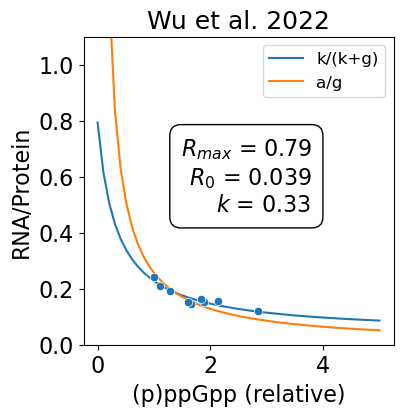

In [10]:
fig = plt.figure(figsize=(4,4))
xlinspace = np.linspace(0,5)
y_n1 = hill_fn_n1(xlinspace,*wu_params_n1)
y_inv = inverse_fn(xlinspace,*params_inv)
sns.scatterplot(data = ppGpp_RNA_Prot_data_wu,x="g",y=r"RNA/Protein", zorder=1)
plt.plot(xlinspace,y_n1,label="k/(k+g)", zorder=-1)
plt.plot(xlinspace,y_inv,label="a/g", zorder=-1)

plt.title("Wu et al. 2022",fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel(r"(p)ppGpp (relative)",fontsize=16)
plt.legend(fontsize=12)

plt.text(3.8,0.6,r"$R_{max}$ = " + f"{R_max:.2n}" + "\n" +\
         r"$R_{0}$ = " + f"{wu_params_n1[1]:.2n}" + "\n" +\
         r"$k$ = " + f"{wu_params_n1[0]:.2n}",horizontalalignment="right",\
        verticalalignment="center",fontsize=16,\
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
# plt.xlim(0,1000)
plt.ylim(0,1.1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/Wu_R_to_g_Model.png",dpi=300,bbox_inches="tight")

In [11]:
### aggregate cremer data, bin by growth rate

In [12]:
cremer_rnaprot = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Chure_and_Cremer_2023_RNAProt.csv")
cremer_ppGpp = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Chure_and_Cremer_2023_ppGpp.csv")

In [13]:
cremer_rnaprot["Growth Bin"] = pd.cut(cremer_rnaprot["growth_rate_hr"],np.linspace(0,2,num=21))
cremer_ppGpp["Growth Bin"] = pd.cut(cremer_ppGpp["growth_rate_hr"],np.linspace(0,2,num=21))

In [14]:
mean_rnaprot = cremer_rnaprot.groupby("Growth Bin")["RNA/Protein"].mean()
mean_relppGpp = cremer_ppGpp.groupby("Growth Bin")["relative_ppGpp"].mean()
agg_df = pd.concat([mean_rnaprot,mean_relppGpp], axis=1).reset_index()
agg_df = agg_df.dropna()

/tmp/ipykernel_12869/4166162074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rnaprot = cremer_rnaprot.groupby("Growth Bin")["RNA/Protein"].mean()
/tmp/ipykernel_12869/4166162074.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_relppGpp = cremer_ppGpp.groupby("Growth Bin")["relative_ppGpp"].mean()


In [15]:
def hill_fn_n1(g, k, R_0, n=1, R_max=R_max):
    return ((k/((g**n)+k))*(R_max-R_0)) + R_0

def inverse_fn(g, a):
    return a/g

## fitting k to the restricted model
initial_guess = [1,0]
params_n1, covariance = sp.optimize.curve_fit(hill_fn_n1, agg_df["relative_ppGpp"], agg_df[r"RNA/Protein"],\
                      p0=initial_guess,maxfev=10000)

initial_guess = [1]
params_inv, covariance = sp.optimize.curve_fit(inverse_fn, agg_df["relative_ppGpp"], agg_df[r"RNA/Protein"],\
                      p0=initial_guess,maxfev=10000)

/tmp/ipykernel_12869/4143814451.py:5: RuntimeWarning: divide by zero encountered in divide
  return a/g


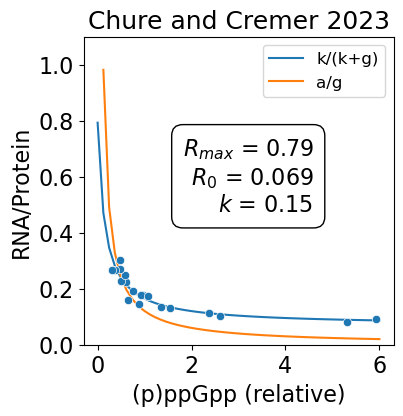

In [16]:
fig = plt.figure(figsize=(4,4))
xlinspace = np.linspace(0,6)
y_n1 = hill_fn_n1(xlinspace,*params_n1)
y_inv = inverse_fn(xlinspace,*params_inv)
sns.scatterplot(data = agg_df,x="relative_ppGpp",y=r"RNA/Protein", zorder=1)
plt.plot(xlinspace,y_n1,label="k/(k+g)", zorder=-1)
plt.plot(xlinspace,y_inv,label="a/g", zorder=-1)
plt.title("Chure and Cremer 2023",fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel("(p)ppGpp (relative)",fontsize=16)
plt.legend(fontsize=12)

plt.text(4.6,0.6,r"$R_{max}$ = " + f"{R_max:.2n}" + "\n" +\
         r"$R_{0}$ = " + f"{params_n1[1]:.2n}" + "\n" +\
         r"$k$ = " + f"{params_n1[0]:.2n}",horizontalalignment="right",\
        verticalalignment="center",fontsize=16,\
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
# plt.xlim(0,1000)
plt.ylim(0,1.1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/Cremer_R_to_g_Model.png",dpi=300,bbox_inches="tight")

### Justifying H(g)=R0

In [17]:
Growth_RNA_Prot_data = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Dai_2016_Growth_R.csv")
Growth_RNA_Prot_data_fast = Growth_RNA_Prot_data[Growth_RNA_Prot_data["Growth Rate (1/h)"]>0.75]
R_line = skl.linear_model.LinearRegression().fit(Growth_RNA_Prot_data_fast["Growth Rate (1/h)"].values[:,np.newaxis],Growth_RNA_Prot_data_fast["RNA/Protein"].values)

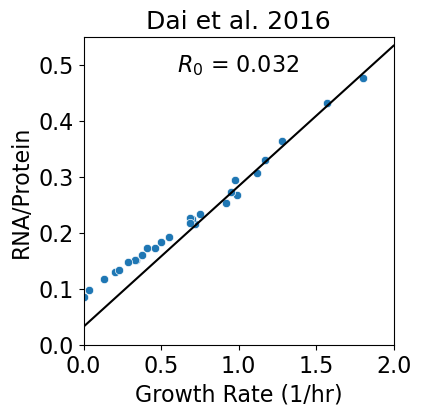

In [18]:
fig = plt.figure(figsize=(4,4))
R_line_x = np.linspace(0,2)
R_line_y = R_line.predict(R_line_x[:,np.newaxis])
plt.plot(R_line_x,R_line_y,color="black")
sns.scatterplot(data = Growth_RNA_Prot_data,x="Growth Rate (1/h)",y="RNA/Protein", zorder=1)
plt.title("Dai et al. 2016",fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel("Growth Rate (1/hr)",fontsize=16)
plt.text(1,0.5,r"$R_{0}$ = " + f"{R_line.intercept_:.2n}",horizontalalignment="center",\
        verticalalignment="center",fontsize=16)
plt.xlim(0,2)
plt.ylim(0,0.55)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/min_R0.png",dpi=300,bbox_inches="tight")

In [19]:
Growth_RNA_Prot_inactive_data = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Dai_2016_Rinavtive.csv")
Growth_RNA_Prot_inactive_data_fast = Growth_RNA_Prot_inactive_data[Growth_RNA_Prot_inactive_data["Growth Rate (1/hr)"]>0.5]
rna_prot_inactive = np.mean(Growth_RNA_Prot_inactive_data_fast["RNA/Protein (inactive)"])

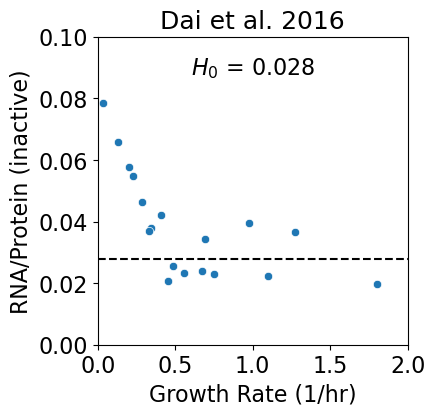

In [20]:
fig = plt.figure(figsize=(4,4))
# R_line_x = np.linspace(0,2)
# R_line_y = R_line.predict(R_line_x[:,np.newaxis])
plt.title("Dai et al. 2016",fontsize=18)
sns.scatterplot(data = Growth_RNA_Prot_inactive_data,x="Growth Rate (1/hr)",y="RNA/Protein (inactive)", zorder=1)
plt.hlines(rna_prot_inactive,0,2,color="black",linestyle="--")

# plt.title("Ryals et al. 1982",fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein (inactive)",fontsize=16)
plt.xlabel("Growth Rate (1/hr)",fontsize=16)
plt.text(1,0.09,r"$H_{0}$ = " + f"{rna_prot_inactive:.2n}",horizontalalignment="center",\
        verticalalignment="center",fontsize=16)
plt.xlim(0,2)
plt.ylim(0,0.1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/min_H0.png",dpi=300,bbox_inches="tight")

### RNA/Protein and Kn are Linear

In [21]:
scott_data = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Scott_2010_Table_S3.csv")
scott_baseline = scott_data[scott_data["Chlor Conc (μM)"] == 0]
scott_baseline = scott_baseline.set_index("Medium")

scott_regs = scott_data.groupby("Medium").apply(lambda x: skl.linear_model.LinearRegression().fit(\
                x["Growth rate λ (1/h)"].values[:,np.newaxis],x["RNA/Protein (μg/μg)"]))
Kn = scott_regs.apply(lambda x: -1/x.coef_[0])
scott_Rmax = scott_regs.apply(lambda x: x.intercept_)
# Kn = scott_data.groupby("Medium").apply(lambda x: -1/skl.linear_model.LinearRegression().fit(\
#                 x["Growth rate λ (1/h)"].values[:,np.newaxis],x["RNA/Protein (μg/μg)"]).coef_[0])
scott_regs = Kn.to_frame().rename(columns={0:"Kn"})
scott_regs["Rmax"] = scott_Rmax
scott_regs = pd.concat([scott_baseline,scott_regs],axis=1)

baseline_model = skl.linear_model.LinearRegression().fit(scott_baseline["Growth rate λ (1/h)"].values[:,np.newaxis],scott_baseline["RNA/Protein (μg/μg)"])
kn_model = skl.linear_model.LinearRegression().fit(scott_regs["RNA/Protein (μg/μg)"].values[:,np.newaxis],scott_regs["Kn"])

/tmp/ipykernel_12869/3330365884.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scott_regs = scott_data.groupby("Medium").apply(lambda x: skl.linear_model.LinearRegression().fit(\


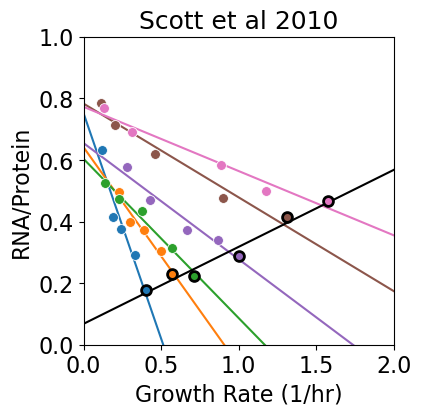

In [22]:
medium_color_dict = {'M63+glyc':'tab:blue', 'M63+gluc':'tab:orange', 'cAA+glyc':'tab:green',\
                     'cAA+gluc':'tab:purple', 'RDM+glyc':'tab:brown','RDM+gluc':'tab:pink'}

fig = plt.figure(figsize=(4,4))

plt.title("Scott et al 2010",fontsize=18)

grlinspace = np.linspace(0,2)
for medium in scott_data["Medium"].unique():
    scott_subset = scott_data[scott_data["Medium"]==medium]
    linear_model = scott_regs.loc[medium]
    knline = linear_model["Rmax"]-(linear_model["Kn"]**-1)*grlinspace
    medium_color = medium_color_dict[medium]
    sns.scatterplot(data = scott_subset,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-10,s=50,color=medium_color)
    sns.scatterplot(data = linear_model.to_frame().T,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-9,s=50,\
                    color=medium_color,edgecolor="black",linewidth=2)
    plt.plot(grlinspace,knline,color=medium_color,zorder=-13)
    
baseline_trace = baseline_model.predict(grlinspace[:,np.newaxis])
plt.plot(grlinspace,baseline_trace,color="black",zorder=-12)

plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel("Growth Rate (1/hr)",fontsize=16)
plt.xlim(0,2)
plt.ylim(0,1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/scott_RvsGR.png",dpi=300,bbox_inches="tight")

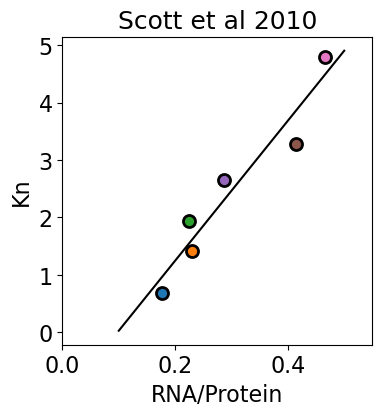

In [23]:
fig = plt.figure(figsize=(4,4))
plt.title("Scott et al 2010",fontsize=18)

rlinspace = np.linspace(0.1,0.5)
for medium in scott_data["Medium"].unique():
    medium_color = medium_color_dict[medium]
    sns.scatterplot(data = scott_regs.loc[medium].to_frame().T,x="RNA/Protein (μg/μg)",y="Kn",zorder=-12,s=75,\
                   color=medium_color,edgecolor="black",linewidth=2)

kn_trace = kn_model.predict(rlinspace[:,np.newaxis])
plt.plot(rlinspace,kn_trace,color="black",zorder=-12)

plt.tick_params(axis="both", labelsize=16)
plt.ylabel("Kn",fontsize=16)
plt.xlabel("RNA/Protein",fontsize=16)
# plt.text(1,0.09,r"$H_{0}$ = " + f"{rna_prot_inactive:.2n}",horizontalalignment="center",\
#         verticalalignment="center",fontsize=16)
# plt.xlim(0,2)
plt.xlim(0,0.55)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/scott_kn_RNA_rln.png",dpi=300,bbox_inches="tight")

### Scott Data Mutants

In [24]:
scott_data_mutants = pd.read_csv("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Data/Supplementary_Theory/Scott_2010_Table_S2.csv")

scott_regs_mutants = scott_data_mutants.groupby("Strain").apply(lambda x: skl.linear_model.LinearRegression().fit(\
                x["Growth rate λ (1/h)"].values[:,np.newaxis],x["RNA/Protein (μg/μg)"]))
Kt = scott_regs_mutants.apply(lambda x: 1/x.coef_[0])
scott_mutants_Rmin = scott_regs_mutants.apply(lambda x: x.intercept_)

scott_regs_mutants = Kt.to_frame().rename(columns={0:"Kt"})
scott_regs_mutants["Rmin"] = scott_mutants_Rmin

/tmp/ipykernel_12869/4148086834.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scott_regs_mutants = scott_data_mutants.groupby("Strain").apply(lambda x: skl.linear_model.LinearRegression().fit(\


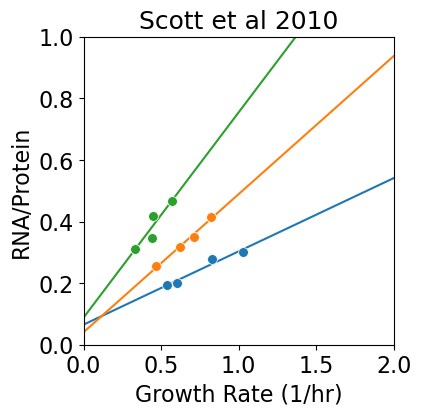

In [25]:
strain_color_dict = {'Xac':'tab:blue', 'SmR':'tab:orange', 'SmP':'tab:green'}

fig = plt.figure(figsize=(4,4))

plt.title("Scott et al 2010",fontsize=18)

grlinspace = np.linspace(0,2)
for strain in scott_data_mutants["Strain"].unique():
    scott_mutants_subset = scott_data_mutants[scott_data_mutants["Strain"]==strain]
    linear_model = scott_regs_mutants.loc[strain]
    ktline = linear_model["Rmin"] + (linear_model["Kt"]**-1)*grlinspace
    strain_color = strain_color_dict[strain]
    sns.scatterplot(data = scott_mutants_subset,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-10,s=50,color=strain_color)
    # sns.scatterplot(data = linear_model.to_frame().T,x="Growth rate λ (1/h)",y="RNA/Protein (μg/μg)", zorder=-9,s=50,\
    #                 color=strain_color,edgecolor="black",linewidth=2)
    plt.plot(grlinspace,ktline,color=strain_color,zorder=-13)
    
plt.tick_params(axis="both", labelsize=16)
plt.ylabel("RNA/Protein",fontsize=16)
plt.xlabel("Growth Rate (1/hr)",fontsize=16)
plt.xlim(0,2)
plt.ylim(0,1)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/scott_RvsGR_mutants.png",dpi=300,bbox_inches="tight")

### (p)ppGpp vs Growth Scaling

In [34]:
R_max = 0.793 ## max ribosome levels
gr_ref = 2 ## reference growth rate
R_ref = 0.3 ## reference ribosome levels
R_0 = 0.03 ## based on dai data
k = 0.334 ## based on wu repressor function
e_max = 20 ##max elongatoin rate

def g_vs_gr_elong(gr,R_max=R_max,gr_ref=gr_ref,R_ref=R_ref,R_0=R_0,k=k,):
    ##setting constant based on argument (sketch)
    c_tau_d = ((R_max-R_ref)*k)/gr_ref
    alpha = c_tau_d/(R_max-R_0)
    phi = alpha*gr    
    g =  (phi/(1-phi/k))
    return g

g_ref = g_vs_gr_elong(gr_ref)

def g_vs_gr_charge(gr,g_ref=g_ref,gr_ref=gr_ref,e_max=e_max,R_0=R_0):
    g0 = g_ref*(1+(gr_ref/(e_max*R_0)))
    ##setting constant based on argument (sketch)
    g = g0/(1+gr/(e_max*R_0))

    return g

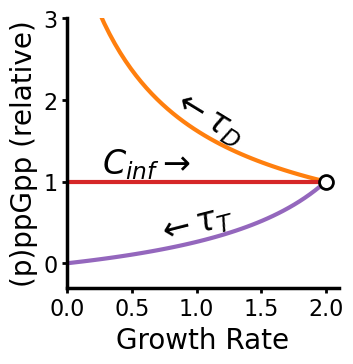

In [49]:
label_idx = 25
null_label_idx = 15

fig = plt.figure(figsize=(3.5,3.5))
ax = plt.subplot(1,1,1)

lamb = np.linspace(0,gr_ref,num=50)
nutrient_line = g_vs_gr_charge(lamb)/g_ref
efg_line = g_vs_gr_elong(lamb)/g_ref
null_line = np.repeat(g_ref,len(lamb))/g_ref

line = plt.plot(lamb,efg_line,color=(0.5803921568627451, 0.403921568627451, 0.7411764705882353),linewidth=3,zorder=-10)[0]
line = plt.plot(lamb,nutrient_line,color=(1.0, 0.4980392156862745, 0.054901960784313725),linewidth=3,zorder=-10)[0]
line = plt.plot(lamb,null_line,color=(0.8392156862745098, 0.15294117647058825, 0.1568627450980392),linewidth=3,zorder=-9)[0]
sns.scatterplot(x=[gr_ref],y=[g_ref/g_ref],zorder=10,s=100,color="white",linewidth=2,edgecolor="black")

plt.tick_params(axis="both", labelsize=16, width=2)
plt.xticks([0.,0.5,1.0,1.5,2.])
plt.yticks([0,1,2,3,4])
plt.ylabel("(p)ppGpp (relative)",fontsize=20)
plt.xlabel("Growth Rate",fontsize=20)
plt.xlim(0,2.1)
plt.ylim(-0.3,3)

ax.spines['bottom'].set_linewidth(2.5) # Set thickness of the bottom spine
ax.spines['left'].set_linewidth(2.5)   # Set thickness of the left spine

dlamb = lamb[label_idx+1] - lamb[label_idx]
defg_line = efg_line[label_idx+1] - efg_line[label_idx]
dnutrient_line = nutrient_line[label_idx+1] - nutrient_line[label_idx]

rotn_efg_line = np.degrees(np.arctan2(defg_line, dlamb))
rotn_nutrient_line = np.degrees(np.arctan2(dnutrient_line, dlamb))

dnull_line = null_line[null_label_idx+1] - null_line[null_label_idx]
rotn_null_line = np.degrees(np.arctan2(dnull_line, dlamb))

plt.text(lamb[label_idx], efg_line[label_idx]+0.01, r"$\leftarrow \tau_{T}$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_efg_line, rotation_mode='anchor', transform_rotates_text=True)
plt.text(lamb[label_idx], nutrient_line[label_idx]+0.01, r"$\leftarrow \tau_{D}$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_nutrient_line, rotation_mode='anchor', transform_rotates_text=True)
plt.text(lamb[null_label_idx], null_line[null_label_idx]+0.01, r"$C_{inf} \rightarrow$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_null_line, rotation_mode='anchor', transform_rotates_text=True)

sns.despine()

plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/ppGpp_model_schematic.png",dpi=300,bbox_inches="tight")

### Growth Theory Schematic

In [50]:
lamb = np.linspace(0,gr_ref)
nutrient_slope = (R_ref-R_0)/gr_ref
efg_slope = (R_ref-R_max)/gr_ref

nutrient_line = R_0 + lamb*nutrient_slope
efg_line = R_max + lamb*efg_slope
null_line = np.repeat(R_ref,len(lamb))

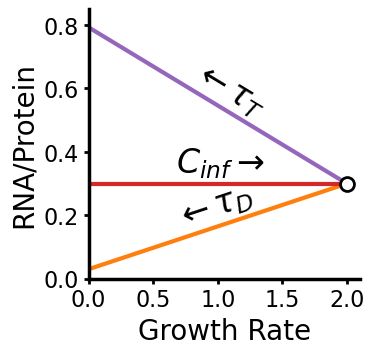

In [56]:
label_idx = 25
fig = plt.figure(figsize=(3.5,3.5))
ax = plt.subplot(1,1,1)

line = plt.plot(lamb,efg_line,color=(0.5803921568627451, 0.403921568627451, 0.7411764705882353),linewidth=3,zorder=-10)[0]
line = plt.plot(lamb,nutrient_line,color=(1.0, 0.4980392156862745, 0.054901960784313725),linewidth=3,zorder=-10)[0]
line = plt.plot(lamb,null_line,color=(0.8392156862745098, 0.15294117647058825, 0.1568627450980392),linewidth=3,zorder=-9)[0]
sns.scatterplot(x=[gr_ref],y=[R_ref],zorder=10,s=100,color="white",linewidth=2,edgecolor="black")

plt.tick_params(axis="both", labelsize=16, width=2)
plt.xticks([0.,0.5,1.0,1.5,2.0])
plt.yticks([0,0.2,0.4,0.6,0.8])
plt.ylabel("RNA/Protein",fontsize=20)
plt.xlabel("Growth Rate",fontsize=20)

ax.spines['bottom'].set_linewidth(2.5) # Set thickness of the bottom spine
ax.spines['left'].set_linewidth(2.5)   # Set thickness of the left spine

dlamb = lamb[label_idx+1] - lamb[label_idx]
defg_line = efg_line[label_idx+1] - efg_line[label_idx]
dnutrient_line = nutrient_line[label_idx+1] - nutrient_line[label_idx]
dnull_line = null_line[label_idx+1] - null_line[label_idx]

rotn_efg_line = np.degrees(np.arctan2(defg_line, dlamb))
rotn_nutrient_line = np.degrees(np.arctan2(dnutrient_line, dlamb))
rotn_null_line = np.degrees(np.arctan2(dnull_line, dlamb))

plt.text(lamb[label_idx], efg_line[label_idx]+0.01, r"$\leftarrow \tau_{T}$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_efg_line, rotation_mode='anchor', transform_rotates_text=True)
plt.text(lamb[label_idx], nutrient_line[label_idx]+0.01, r"$\leftarrow \tau_{D}$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_nutrient_line, rotation_mode='anchor', transform_rotates_text=True)
plt.text(lamb[label_idx], null_line[label_idx]+0.01, r"$C_{inf} \rightarrow$", ha='center', va='bottom', fontsize=24,
        rotation=rotn_null_line, rotation_mode='anchor', transform_rotates_text=True)

sns.despine()

plt.xlim(0,2.1)
plt.ylim(0,0.85)
plt.savefig("/home/de64/group/de64/CRISPRi_Libraries/dev_notebooks/2024-11-23_Figure_Notebooks/Supplementary_Theory/growth_model_schematic.png",dpi=300,bbox_inches="tight")